# Advanced architectures (API) with keras

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
# Base model 

from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

mnist = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# reshape the data 

x_train = x_train.reshape(60000, 784).astype('float32') / 255. 
x_test  = x_test.reshape(10000, 784).astype('float32') / 255. 

model_base = Sequential()
model_base.add(Dense(64, activation='relu', input_shape=(784,)))
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(10, activation='softmax'))

model_base.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model with the functional API from Keras

In [5]:
from tensorflow import keras 

inputs = keras.Input(shape=(784,))

inputs.shape


TensorShape([None, 784])

In [6]:
inputs.dtype

tf.float32

In [7]:
dense1 = Dense(64, activation='relu')(inputs)

In [8]:
dense2 = Dense(64, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)

In [9]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
inputs  = keras.Input(shape=(784,))
dense1  = Dense(64, activation='relu')(inputs)
dense2  = Dense(64, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


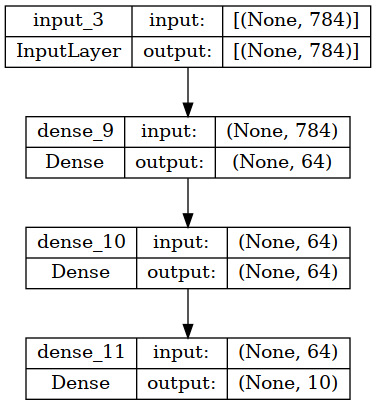

In [11]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [12]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1235 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0694 - accuracy: 0.9785
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0820 - accuracy: 0.9753


[0.08201489597558975, 0.9753000140190125]

Different ways of use of the API

In [13]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = Dense(1, activation='sigmoid')(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

# te idea is create some layers that are not feedforward 

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)

outputs = keras.layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 model_1 (Functional)        (None, 1)                    129       ['input_7[0][0]']             
                                                                                                  
 model_2 (Functional)        (None, 1)                    129       ['input_7[0][0]']             
                                                                                                  
 model_3 (Functional)        (None, 1)                    129       ['input_7[0][0]']             
                                                                                            

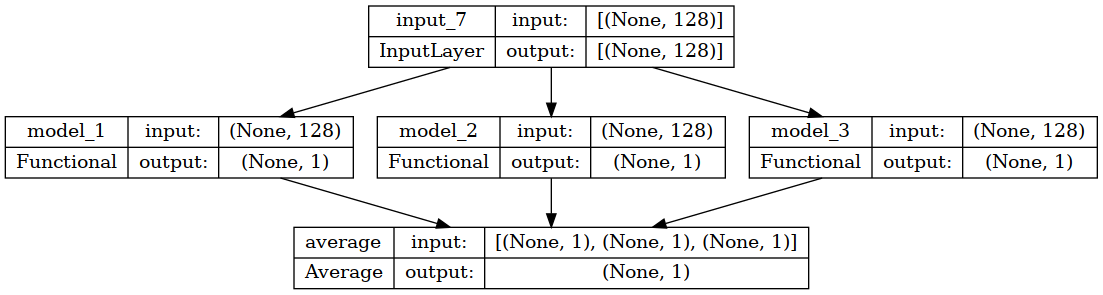

In [14]:
keras.utils.plot_model(ensemble_model, show_shapes=True)

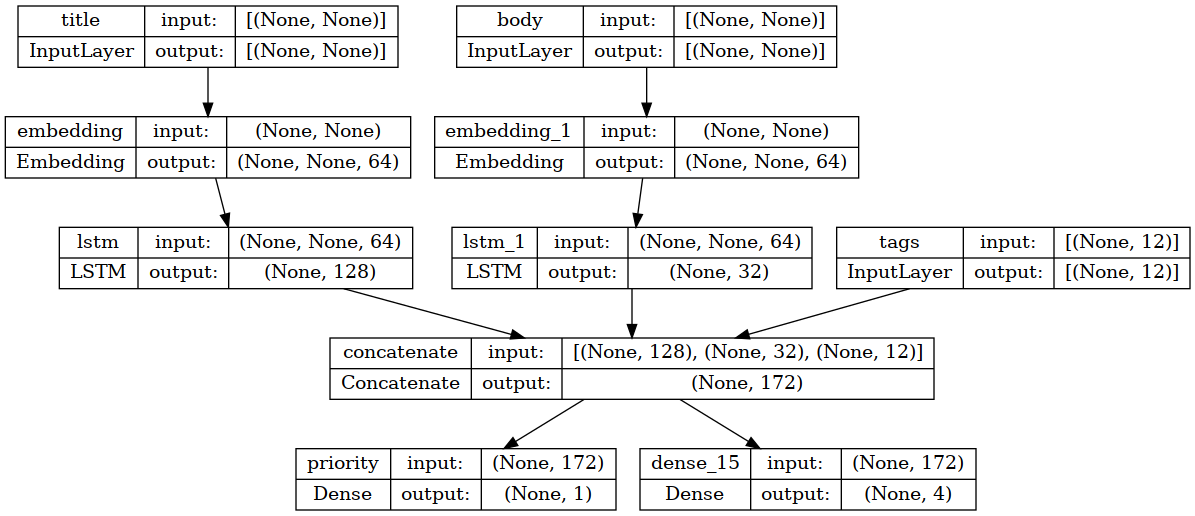

In [15]:
# Now for a case of 3 inputs with a feedforward and a final merge

num_tags: int  = 12 
num_words: int = 10000
num_departments: int = 4


#creating the 3 inputs
title_input = keras.Input(shape=(None,), name='title')
body_input = keras.Input(shape=(None,), name='body')
tags_input = keras.Input(shape=(num_tags,), name='tags')


# creating the layers 

title_features = keras.layers.Embedding(num_words, 64)(title_input)
body_features = keras.layers.Embedding(num_words, 64)(body_input)

title_features = keras.layers.LSTM(128)(title_features)
body_features = keras.layers.LSTM(32)(body_features)

x = keras.layers.concatenate([title_features, body_features, tags_input])

priority_pred = keras.layers.Dense(1, activation='sigmoid', name='priority')(x)
department_pred = keras.layers.Dense(num_departments, activation='softmax')(x)

model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

keras.utils.plot_model(model, show_shapes=True)

## Pre trained NN

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D


input_shape = (224, 224, 3)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, 
                 padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [17]:
#import a similar NN 

from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

CIFAR workload

170498071/170498071 [==============================] - 11s 0us/step


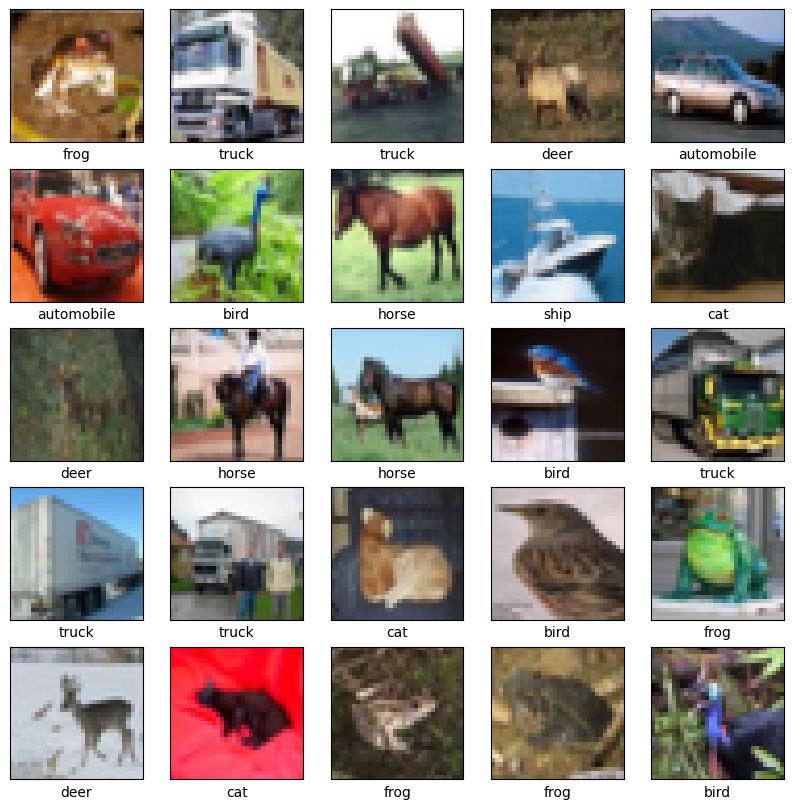

In [19]:
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt 

(train_images, train_labels), (test_images, test_labels) = load_data()
train_images, test_images = train_images / 255.0, test_images /255.0 

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()    



In [20]:
def plot_history(history):
  val_loss = history.history['val_loss' ]
  loss =     history.history['loss' ]
  acc =      history.history['accuracy' ]
  val_acc =  history.history['val_accuracy' ]

  epochs    = range(1,len(acc)+1,1)

  plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
  plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
  plt.title ('Training and validation accuracy')
  plt.ylabel('acc')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()

  plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
  plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
  plt.title ('Training and validation loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()

RESNET50 without re training 

In [21]:
EPOCHS = 10

In [22]:
modelresnet50v2 = tf.keras.applications.ResNet50V2(include_top=True, weights=None,
                    input_shape=(32,32,3), classes=10)

In [23]:
opt = tf.keras.optimizers.Adam(0.002)

modelresnet50v2.compile(loss='sparse_categorical_crossentropy',
                        optimizer=opt,
                        metrics=['accuracy'])

history = modelresnet50v2.fit(train_images, train_labels, epochs=EPOCHS,
                              validation_data=(test_images, test_labels))

Epoch 1/10


2024-12-26 11:36:26.719173: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 2822s 2s/step - loss: 2.2669 - accuracy: 0.2629 - val_loss: 2.1431 - val_accuracy: 0.2830
Epoch 2/10
1323/1563 [========================>.....] - ETA: 6:59 - loss: 1.9598 - accuracy: 0.3251

KeyboardInterrupt: 